# Model Inference on unseen images and Real-time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = {'methods':['LBP(4,1)', 'LBP(4,1) with facial landmarks', 'ResNet50', 'Inception-V3', 'ResNet50_Aug', 'Inception-V3_Aug', 'ResNet50 with facial landmarks', 'Inception-V3 with facial landmarks'],
        'accuracy':[62,52,80,82,84,84,82,83 ],
        'F1_Score':[53,44,75,79,80,81,79,79]}

In [4]:
df = pd.DataFrame(data)
df

,methods,accuracy,F1_Score
0,"LBP(4,1)",62,53
1,"LBP(4,1) with facial landmarks",52,44
2,ResNet50,80,75
3,Inception-V3,82,79
4,ResNet50_Aug,84,80
5,Inception-V3_Aug,84,81
6,ResNet50 with facial landmarks,82,79
7,Inception-V3 with facial landmarks,83,79


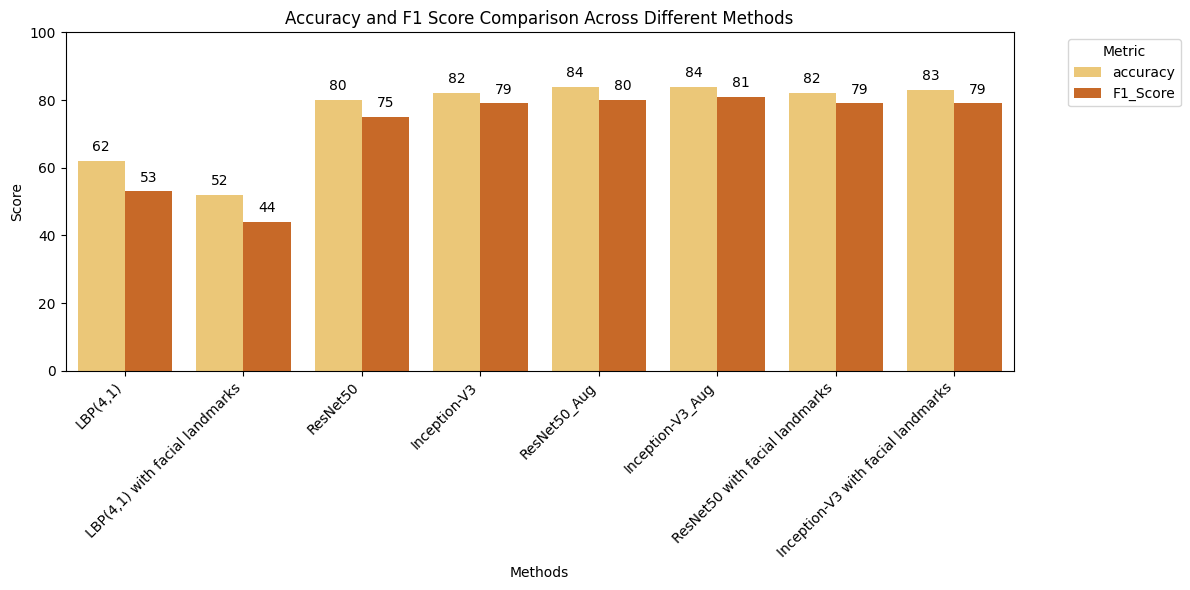

In [21]:
melted_df = pd.melt(df, id_vars='methods', var_name='Metric', value_name='Score')

yellow_palette = sns.color_palette("YlOrBr", n_colors=2)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='methods', y='Score', hue='Metric', data=melted_df, palette=yellow_palette)

# Annotating the bars with the corresponding values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.title('Accuracy and F1 Score Comparison Across Different Methods')
plt.xlabel('Methods')
plt.ylabel('Score')
plt.ylim(0, 100)  # Assuming scores are percentages (adjust if needed)
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()